# The Sparks Foundation

#### Data Science and Business Analytics Internship.  | GRIPAPRIL21

## TASK-6 Prediction using Decision Tree Algorithm

### AUTHOR - Chandan Kumar Sharma

#### Problem Statement:

Here we will create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [111]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
%matplotlib inline

In [112]:
# Loading data Iris
df1 = pd.read_csv('Iris.csv')
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [113]:
df1.shape

(150, 6)

In [114]:
df1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [115]:
# Checking for null values
df1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [116]:
# droping Id column because its not important for prediction of species
df2 = df1.drop(['Id'],axis=1)
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
df2.shape

(150, 5)

#### Label Encoding the dependent variable

In [118]:
le = LabelEncoder()
df2['Species'] = le.fit_transform(df2['Species'])
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [119]:
df2['Species'].unique()

array([0, 1, 2], dtype=int64)

#### Creating train and test data

In [120]:
X = df2.iloc[:, :-1].values
Y = df2.iloc[:, -1].values

#### Splitting traing and test data

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

#### Feature Scaling

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-1.02366372 -2.37846268 -0.18295039 -0.29145882]
 [ 0.69517462 -0.10190314  0.93066067  0.73721938]
 [ 0.92435306  0.58106472  1.04202177  1.6373128 ]
 [ 0.1222285  -1.92315077  0.6522579   0.35146505]
 [ 0.92435306 -1.24018291  1.09770233  0.73721938]
 [-0.33612839 -1.24018291  0.03977182 -0.16287405]
 [ 2.07024529 -0.10190314  1.26474398  1.38014325]
 [ 0.46599617  0.58106472  0.48521625  0.48004983]
 [-0.45071761 -1.46783886 -0.01590873 -0.16287405]
 [ 0.46599617 -0.784871    0.59657735  0.73721938]
 [ 0.46599617 -0.55721505  0.70793846  0.35146505]
 [-1.13825295 -1.24018291  0.37385514  0.6086346 ]
 [ 0.46599617 -1.24018291  0.6522579   0.86580415]
 [ 1.26812073  0.35340877  0.48521625  0.22288028]
 [ 0.69517462 -0.10190314  0.76361901  0.99438893]
 [ 0.1222285   0.80872067  0.37385514  0.48004983]
 [-1.25284217  0.12575281 -1.24088089 -1.32013702]
 [-0.10694994 -0.784871    0.70793846  0.86580415]
 [-0.33612839 -0.784871    0.20681348  0.0942955 ]
 [-0.33612839 -0.32955909 -0.12

#### Creating Decision Tree Classification Model

In [123]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### Predicting result

In [124]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]]


#### Calculating confusion matrix and Accuracy

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


0.9777777777777777

#### Our Decision Tree Model is giving 98% accuracy which is good.

#### Plotting decision tree model

In [126]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [127]:
fn = ['SepalLength (Cm)','SepalWidth (Cm)','PetalLength (Cm)','PetalWidth (Cm)','']
cn=['setosa','versicolor','virginica']


[Text(334.8, 489.24, 'PetalWidth (Cm) <= -0.613\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]\nclass = virginica'),
 Text(251.10000000000002, 380.52000000000004, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(418.5, 380.52000000000004, 'PetalLength (Cm) <= 0.624\nentropy = 0.993\nsamples = 71\nvalue = [0, 32, 39]\nclass = virginica'),
 Text(167.4, 271.8, 'PetalWidth (Cm) <= 0.544\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]\nclass = versicolor'),
 Text(83.7, 163.08000000000004, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(251.10000000000002, 163.08000000000004, 'SepalWidth (Cm) <= 0.126\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(167.4, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(334.8, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(669.6, 271.8, 'PetalWidth (Cm) <= 0.673\nentropy = 

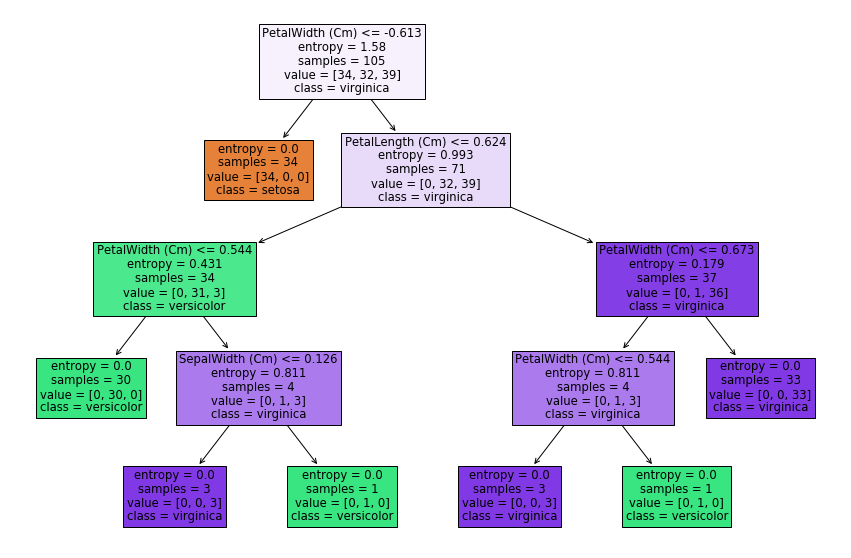

In [128]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,feature_names = fn, class_names= cn,filled=True)

#### Completed TASK-6

Thank You!

Chandan Kumar Sharma